CODSOFT - TASK 1

TITANIC SURVIVAL PREDICTION

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [5]:
train=pd.read_csv('tested.csv')
test=pd.read_csv('tested.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


EXPLORATORY DATA ANALYSIS

<Axes: xlabel='Age', ylabel='Density'>

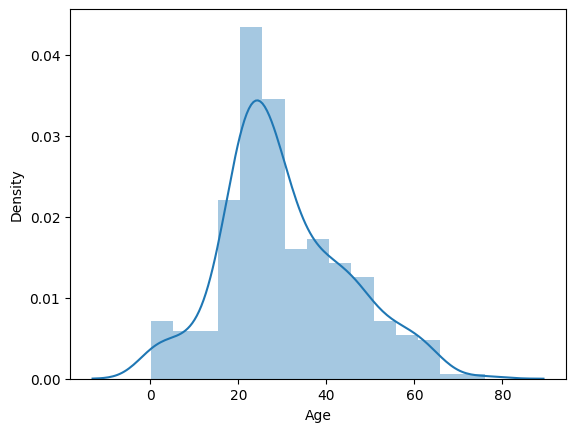

In [10]:
sns.distplot(train['Age'])

<Axes: xlabel='Fare', ylabel='Density'>

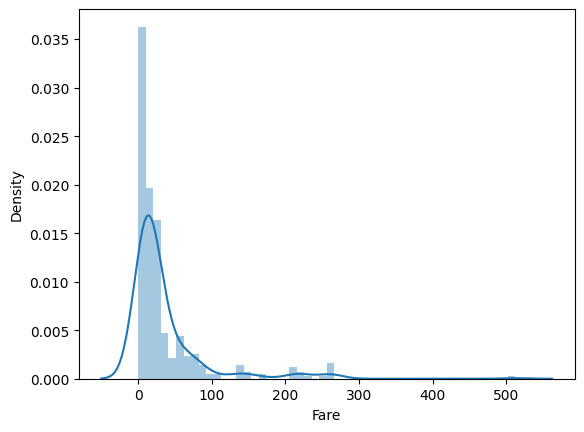

In [11]:
sns.distplot(train['Fare'])

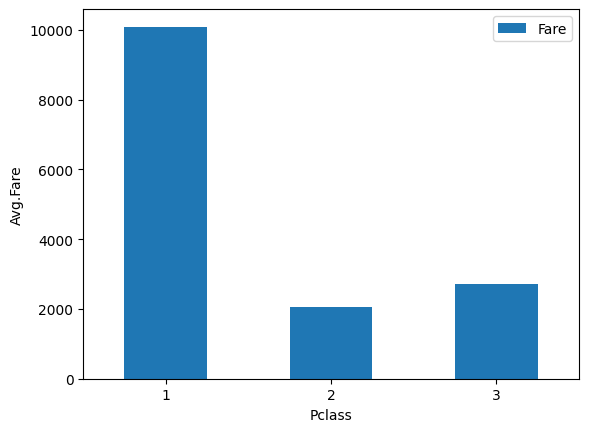

In [12]:
class_fare=train.pivot_table(index='Pclass',values='Fare',aggfunc=np.sum)
class_fare.plot(kind='bar')
plt.xlabel('Pclass')
plt.ylabel('Avg.Fare')
plt.xticks(rotation=0)
plt.show()

<Axes: xlabel='Pclass', ylabel='Fare'>

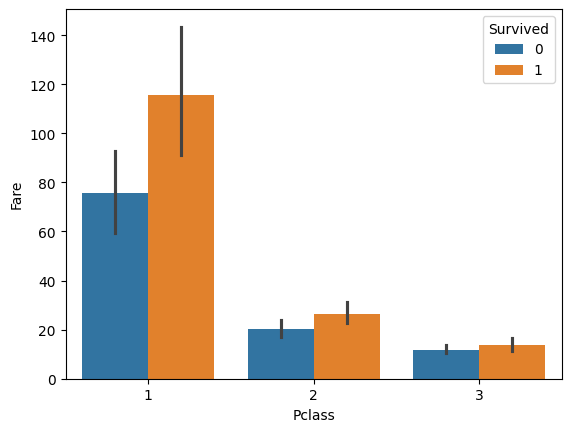

In [13]:
sns.barplot(data=train, x='Pclass', y='Fare', hue='Survived')

<Axes: xlabel='Survived', ylabel='Fare'>

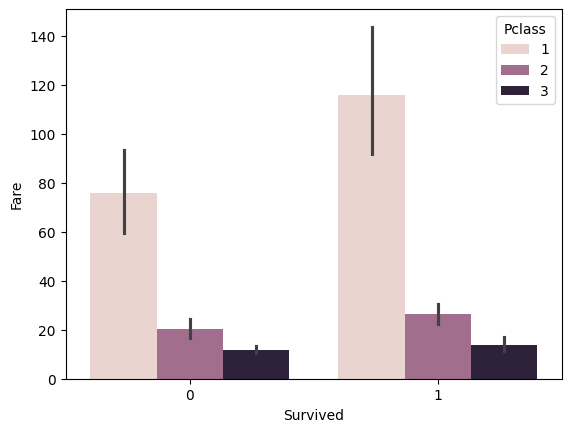

In [14]:
sns.barplot(data=train, x='Survived', y='Fare', hue='Pclass')

In [15]:
train_len=len(train)
df=pd.concat([train, test],axis=0)
df=df.reset_index(drop=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [16]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
831,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
832,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
833,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
834,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
835,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [17]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            172
SibSp            0
Parch            0
Ticket           0
Fare             2
Cabin          654
Embarked         0
dtype: int64

In [18]:
df=df.drop(columns=['Cabin'], axis=1)

In [19]:
df['Age'].mean()

30.272590361445783

In [20]:
df['Age']=df['Age'].fillna(df['Age'].mean())
df['Fare']=df['Fare'].fillna(df['Fare'].mean())

In [21]:
df['Embarked'].mode()[0]

'S'

<Axes: xlabel='Fare', ylabel='Density'>

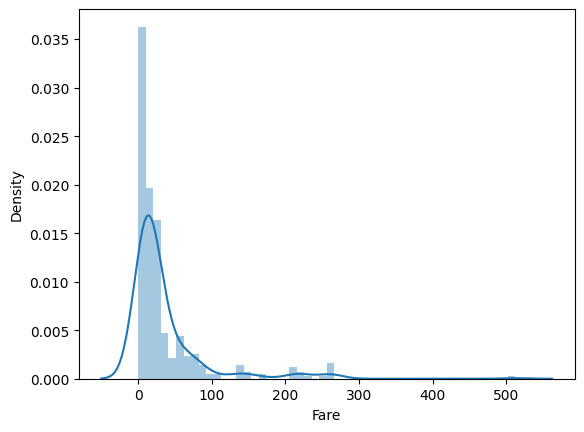

In [22]:
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])
sns.distplot(train['Fare'])

<Axes: xlabel='Fare', ylabel='Density'>

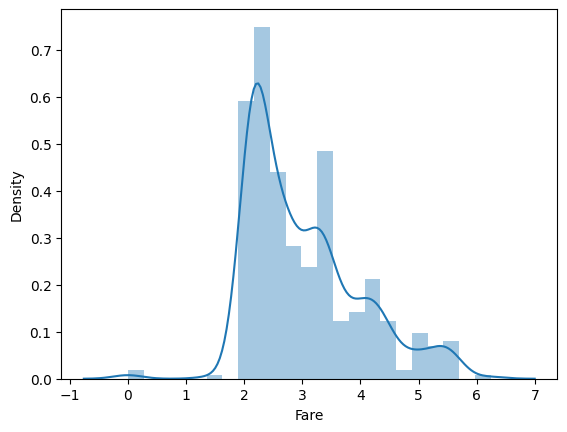

In [23]:
df['Fare']=np.log(df['Fare']+1)
sns.distplot(df['Fare'])

In [26]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,2.178064,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,2.079442,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,2.369075,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,2.268252,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,2.586824,S


In [27]:
df=df.drop(columns=['Name','Ticket'],axis=1)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,0,3,male,34.5,0,0,2.178064,Q
1,893,1,3,female,47.0,1,0,2.079442,S
2,894,0,2,male,62.0,0,0,2.369075,Q
3,895,0,3,male,27.0,0,0,2.268252,S
4,896,1,3,female,22.0,1,1,2.586824,S


In [28]:
from sklearn.preprocessing import LabelEncoder
cols=['Sex','Embarked']
le=LabelEncoder()
for col in cols:
    df[col]=le.fit_transform(df[col])
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,0,3,1,34.5,0,0,2.178064,1
1,893,1,3,0,47.0,1,0,2.079442,2
2,894,0,2,1,62.0,0,0,2.369075,1
3,895,0,3,1,27.0,0,0,2.268252,2
4,896,1,3,0,22.0,1,1,2.586824,2


In [29]:
train=df.iloc[:train_len, :]
test=df.iloc[train_len:, :]
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,0,3,1,34.5,0,0,2.178064,1
1,893,1,3,0,47.0,1,0,2.079442,2
2,894,0,2,1,62.0,0,0,2.369075,1
3,895,0,3,1,27.0,0,0,2.268252,2
4,896,1,3,0,22.0,1,1,2.586824,2


In [30]:
x=train.drop(columns=['PassengerId','Survived'], axis=1)
y=train['Survived']
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,2.178064,1
1,3,0,47.0,1,0,2.079442,2
2,2,1,62.0,0,0,2.369075,1
3,3,1,27.0,0,0,2.268252,2
4,3,0,22.0,1,1,2.586824,2


In [31]:
from sklearn.model_selection import train_test_split, cross_val_score
def classify(model):
    x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, random_state=50)
    model.fit(x_train, y_train)
    print('Acurracy:' , model.score(x_test, y_test))
    score= cross_val_score(model,x,y, cv=5)
    print('CV Score:' , np.mean(score))
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
classify(model)

Acurracy: 1.0
CV Score: 1.0


In [32]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
classify(model)

Acurracy: 1.0
CV Score: 1.0


In [34]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
classify(model)

Acurracy: 1.0
CV Score: 1.0


In [35]:
model=RandomForestClassifier()
model.fit(x,y)
test.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
418,892,0,3,1,34.5,0,0,2.178064,1
419,893,1,3,0,47.0,1,0,2.079442,2
420,894,0,2,1,62.0,0,0,2.369075,1
421,895,0,3,1,27.0,0,0,2.268252,2
422,896,1,3,0,22.0,1,1,2.586824,2


In [36]:
x_test=test.drop(columns=['PassengerId','Survived'], axis=1)
x_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
418,3,1,34.5,0,0,2.178064,1
419,3,0,47.0,1,0,2.079442,2
420,2,1,62.0,0,0,2.369075,1
421,3,1,27.0,0,0,2.268252,2
422,3,0,22.0,1,1,2.586824,2


In [37]:
pred= model.predict(x_test)
pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,